In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Results

In [2]:
# file_name = './CWoLa_Hunting_Hidden_Valley_training_results.csv'
file_name = './CWoLa_Hunting_Hidden_Valley_training_results-2.csv'
df = pd.read_csv(file_name)

In [3]:
def realistic_sensitivity(S, B):
    return np.sqrt(2 * (S + B) * np.log(1 + S/B) - 2 * S)


def convert_to_realistic_sensitivity(sensitivity, nB=136.1*139):
    nS = sensitivity * nB**0.5
    return realistic_sensitivity(nS, nB) 

In [4]:
# cross-section x luminosity
n_bkg_in_SR = 136.1 * 139


def get_realistic_sensitivity_and_std(model_name_format, sensitivity_range=range(11), s=slice(-10, None)):
    # sensitivities after CWoLa selection with different background efficiencies 10%, 1%, 0.1%
    sensitivities = [[], [], []]
    stds = [[], [], []]

    for i in sensitivity_range:
        model_name = model_name_format.format(i)
        # compute mean value and standard deviation of realistic sensitivity
        for j, fpr in enumerate([0.1, 0.01, 0.001]):
            scale_factor = df[df['Model Name'] == model_name][f'TPR/FPR^0.5: FPR={fpr}'][s]
            real_sensitivities = convert_to_realistic_sensitivity(i * scale_factor, nB=n_bkg_in_SR * fpr)
            sensitivities[j].append(real_sensitivities.mean())
            stds[j].append(real_sensitivities.std())

    return sensitivities, stds


def get_realistic_sensitivity_and_std_from_models(model_names, sensitivity, s=slice(-10, None)):
    # sensitivities after CWoLa selection with different background efficiencies 10%, 1%, 0.1%
    sensitivities = [[], [], []]
    stds = [[], [], []]

    for model_name in model_names:
        # compute mean value and standard deviation of realistic sensitivity
        for j, fpr in enumerate([0.1, 0.01, 0.001]):
            scale_factor = df[df['Model Name'] == model_name][f'TPR/FPR^0.5: FPR={fpr}'][s]
            real_sensitivities = convert_to_realistic_sensitivity(sensitivity * scale_factor, nB=n_bkg_in_SR * fpr)
            sensitivities[j].append(real_sensitivities.mean())
            stds[j].append(real_sensitivities.std())

    return sensitivities, stds

def get_average_realistic_sensitivity_and_std(model_name_formats, sensitivity_range=range(11), s=slice(-10, None)):
    # sensitivities after CWoLa selection with different background efficiencies 10%, 1%, 0.1%
    sensitivities = [[], [], []]
    stds = [[], [], []]

    for i in sensitivity_range:
        for j, fpr in enumerate([0.1, 0.01, 0.001]):
            # compute mean value and standard deviation of realistic sensitivity
            real_sensitivities = []
            for model_name_format in model_name_formats:
                model_name = model_name_format.format(i)
            
            
                scale_factor = df[df['Model Name'] == model_name][f'TPR/FPR^0.5: FPR={fpr}'][s]
                real_sensitivities.append(convert_to_realistic_sensitivity(i * scale_factor, nB=n_bkg_in_SR * fpr))
            real_sensitivities = np.concatenate(real_sensitivities)
            sensitivities[j].append(np.mean(real_sensitivities))
            stds[j].append(np.std(real_sensitivities))

    return sensitivities, stds

## New Process flow

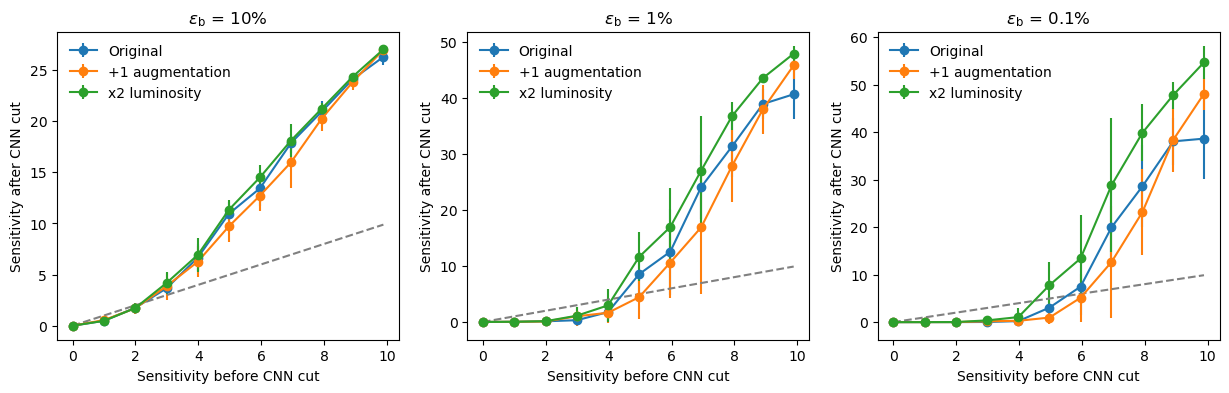

In [5]:
sensitivities_origin_split_val, stds_origin_split_val = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_aug_1_split_val, stds_aug_1_split_val = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_75x75')
sensitivities_x2_split_val, stds_x2_split_val = get_realistic_sensitivity_and_std('SB_{:.1f}_x2_75x75')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin_split_val[i], yerr=stds_origin_split_val[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug_1_split_val[i], yerr=stds_aug_1_split_val[i], marker='o', label='+1 augmentation')
    ax[i].errorbar(sensitivities, sensitivities_x2_split_val[i], yerr=stds_x2_split_val[i], marker='o', label='x2 luminosity')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_aug_1_x2_split_val_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

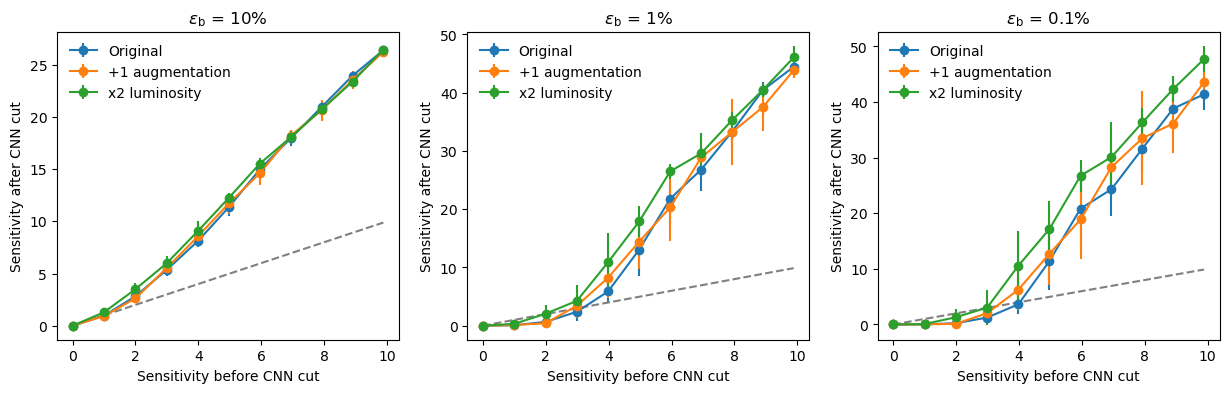

In [6]:
sensitivities_origin_split_val, stds_origin_split_val = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_aug_1_split_val, stds_aug_1_split_val = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_25x25')
sensitivities_x2_split_val, stds_x2_split_val = get_realistic_sensitivity_and_std('SB_{:.1f}_x2_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin_split_val[i], yerr=stds_origin_split_val[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug_1_split_val[i], yerr=stds_aug_1_split_val[i], marker='o', label='+1 augmentation')
    ax[i].errorbar(sensitivities, sensitivities_x2_split_val[i], yerr=stds_x2_split_val[i], marker='o', label='x2 luminosity')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_aug_1_x2_split_val_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Smearing scale

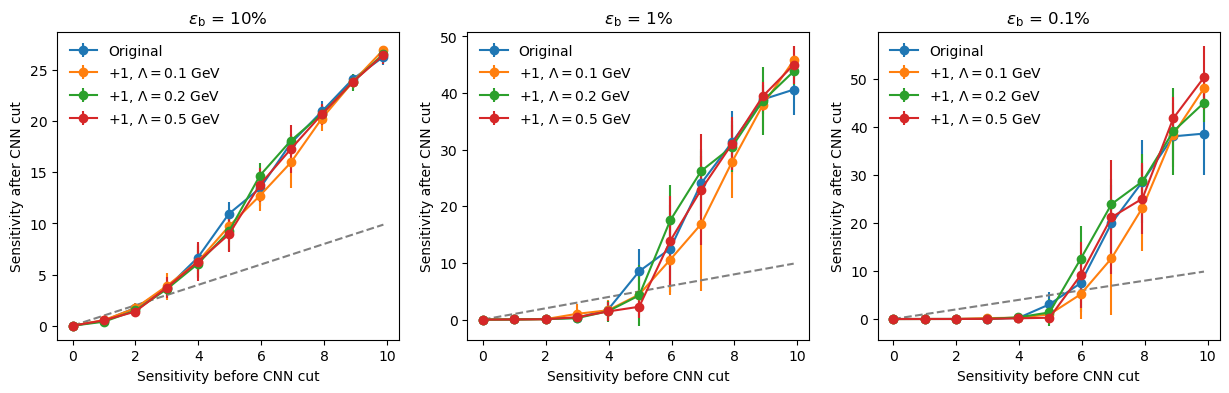

In [5]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_01, stds_01 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_75x75')
sensitivities_02, stds_02 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_std_02_75x75')
sensitivities_05, stds_05 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_std_05_75x75')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_01[i], yerr=stds_01[i], marker='o', label='+1, $\Lambda=0.1$ GeV')
    ax[i].errorbar(sensitivities, sensitivities_02[i], yerr=stds_02[i], marker='o', label='+1, $\Lambda=0.2$ GeV')
    ax[i].errorbar(sensitivities, sensitivities_05[i], yerr=stds_05[i], marker='o', label='+1, $\Lambda=0.5$ GeV')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_aug_1_std_01_02_05_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

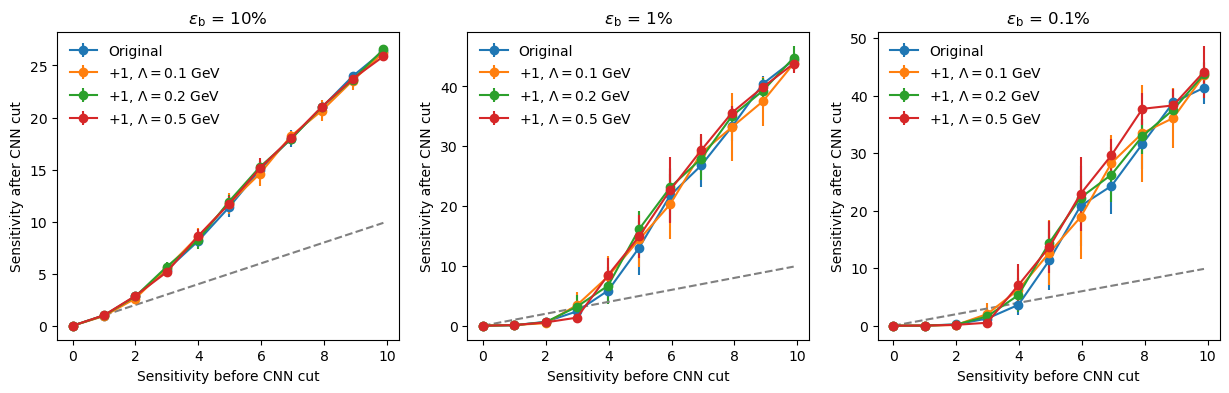

In [6]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_01, stds_01 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_25x25')
sensitivities_02, stds_02 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_std_02_25x25')
sensitivities_05, stds_05 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_std_05_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_01[i], yerr=stds_01[i], marker='o', label='+1, $\Lambda=0.1$ GeV')
    ax[i].errorbar(sensitivities, sensitivities_02[i], yerr=stds_02[i], marker='o', label='+1, $\Lambda=0.2$ GeV')
    ax[i].errorbar(sensitivities, sensitivities_05[i], yerr=stds_05[i], marker='o', label='+1, $\Lambda=0.5$ GeV')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_aug_1_std_01_02_05_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## $p_\text{T}$ smearing

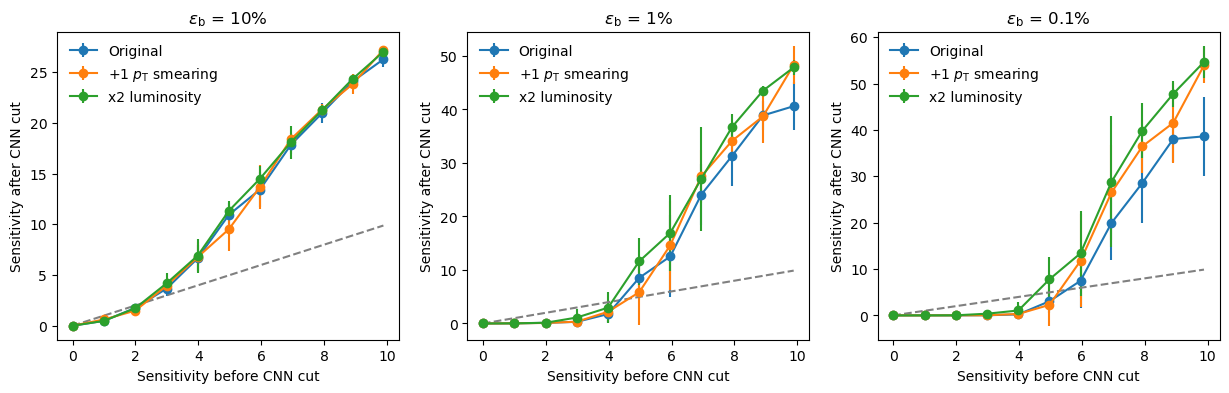

In [5]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_aug, stds_aug = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_1_75x75')
sensitivities_x2, stds_x2 = get_realistic_sensitivity_and_std('SB_{:.1f}_x2_75x75')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug[i], yerr=stds_aug[i], marker='o', label='+1 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_x2[i], yerr=stds_x2[i], marker='o', label='x2 luminosity')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_pt_aug_1_x2_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

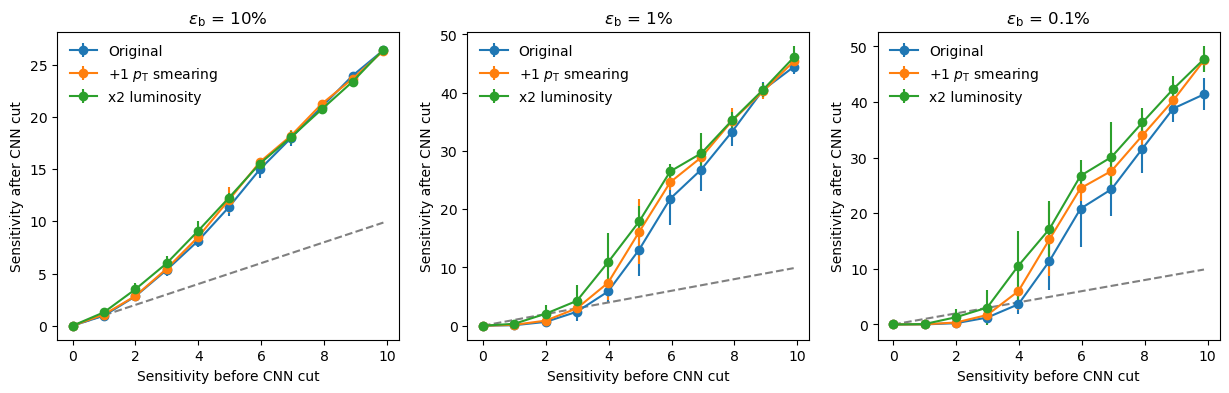

In [6]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_aug, stds_aug = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_1_25x25')
sensitivities_x2, stds_x2 = get_realistic_sensitivity_and_std('SB_{:.1f}_x2_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug[i], yerr=stds_aug[i], marker='o', label='+1 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_x2[i], yerr=stds_x2[i], marker='o', label='x2 luminosity')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_pt_aug_1_x2_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## More augmented sample

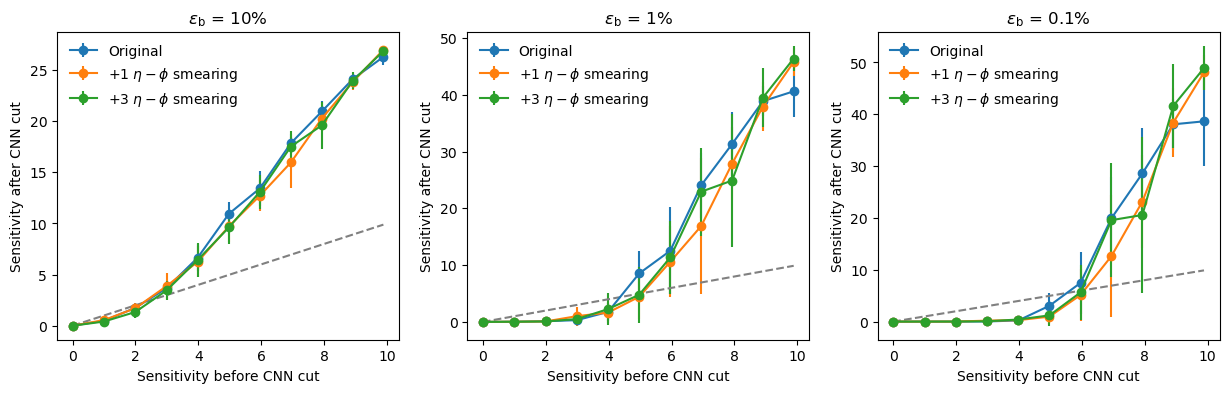

In [11]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_aug_1, stds_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_75x75')
sensitivities_aug_3, stds_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_3_75x75')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug_1[i], yerr=stds_aug_1[i], marker='o', label='+1 $\eta-\phi$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_aug_3[i], yerr=stds_aug_3[i], marker='o', label='+3 $\eta-\phi$ smearing')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_eta_phi_aug_1_3_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

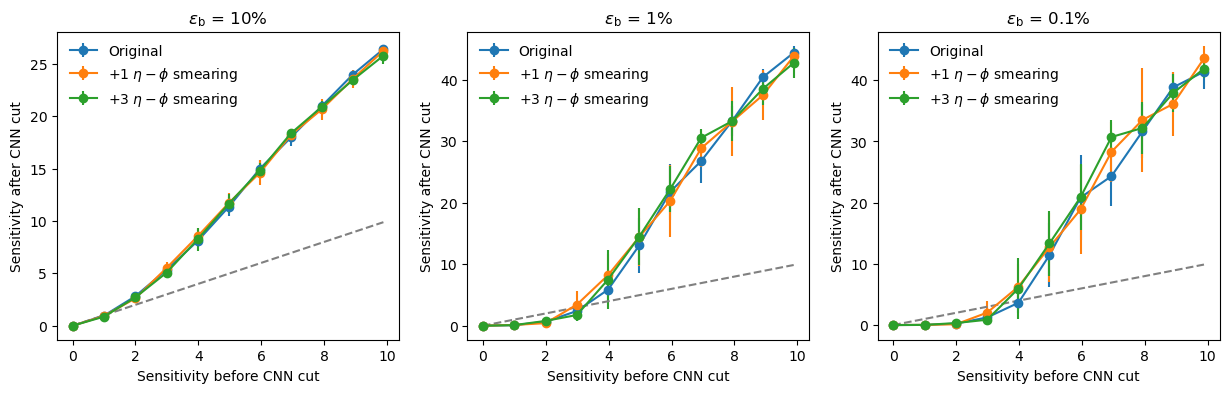

In [12]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_aug_1, stds_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_25x25')
sensitivities_aug_3, stds_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_3_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug_1[i], yerr=stds_aug_1[i], marker='o', label='+1 $\eta-\phi$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_aug_3[i], yerr=stds_aug_3[i], marker='o', label='+3 $\eta-\phi$ smearing')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_eta_phi_aug_1_3_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

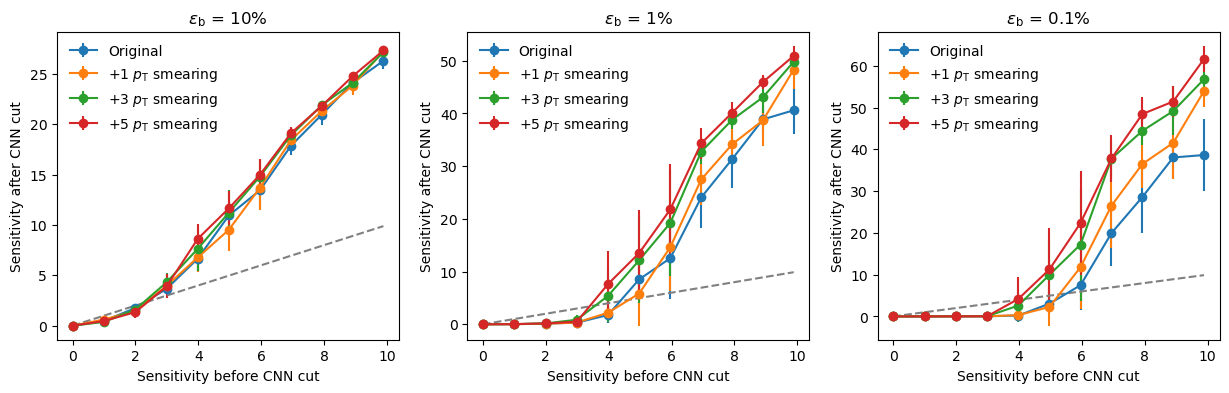

In [7]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_aug_1, stds_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_1_75x75')
sensitivities_aug_3, stds_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_3_75x75')
sensitivities_aug_5, stds_aug_5 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_5_75x75')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug_1[i], yerr=stds_aug_1[i], marker='o', label='+1 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_aug_3[i], yerr=stds_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_aug_5[i], yerr=stds_aug_5[i], marker='o', label='+5 $p_\mathrm{T}$ smearing')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_pt_aug_1_3_5_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

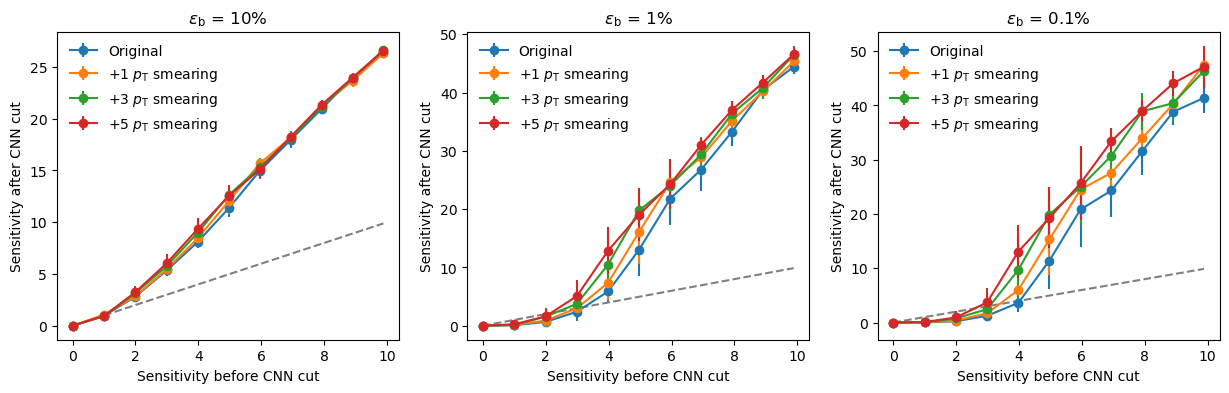

In [8]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_aug_1, stds_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_1_25x25')
sensitivities_aug_3, stds_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_3_25x25')
sensitivities_aug_5, stds_aug_5 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_5_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug_1[i], yerr=stds_aug_1[i], marker='o', label='+1 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_aug_3[i], yerr=stds_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_aug_5[i], yerr=stds_aug_5[i], marker='o', label='+5 $p_\mathrm{T}$ smearing')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_pt_aug_1_3_5_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## $\eta-\phi$ + $p_\text{T}$ smearing

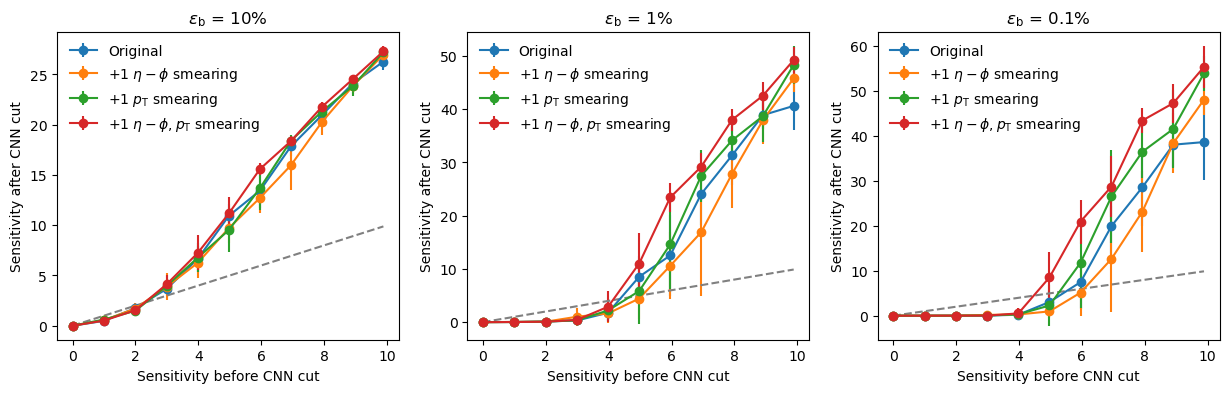

In [5]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_eta_phi_aug_1, stds_eta_phi_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_75x75')
sensitivities_pt_aug_1, stds_pt_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_1_75x75')
sensitivities_all_aug_1, stds_all_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_eta_phi_pt_aug_1_75x75')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_eta_phi_aug_1[i], yerr=stds_eta_phi_aug_1[i], marker='o', label='+1 $\eta-\phi$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_pt_aug_1[i], yerr=stds_pt_aug_1[i], marker='o', label='+1 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_all_aug_1[i], yerr=stds_all_aug_1[i], marker='o', label='+1 $\eta-\phi, p_\mathrm{T}$ smearing')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_eta_phi_pt_aug_1_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

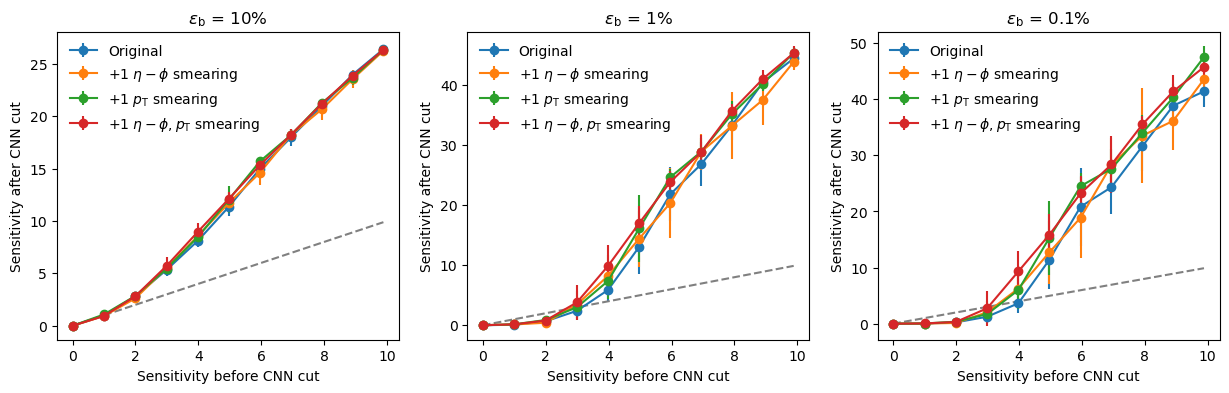

In [6]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_eta_phi_aug_1, stds_eta_phi_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_25x25')
sensitivities_pt_aug_1, stds_pt_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_1_25x25')
sensitivities_all_aug_1, stds_all_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_eta_phi_pt_aug_1_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_eta_phi_aug_1[i], yerr=stds_eta_phi_aug_1[i], marker='o', label='+1 $\eta-\phi$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_pt_aug_1[i], yerr=stds_pt_aug_1[i], marker='o', label='+1 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_all_aug_1[i], yerr=stds_all_aug_1[i], marker='o', label='+1 $\eta-\phi, p_\mathrm{T}$ smearing')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_eta_phi_pt_aug_1_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

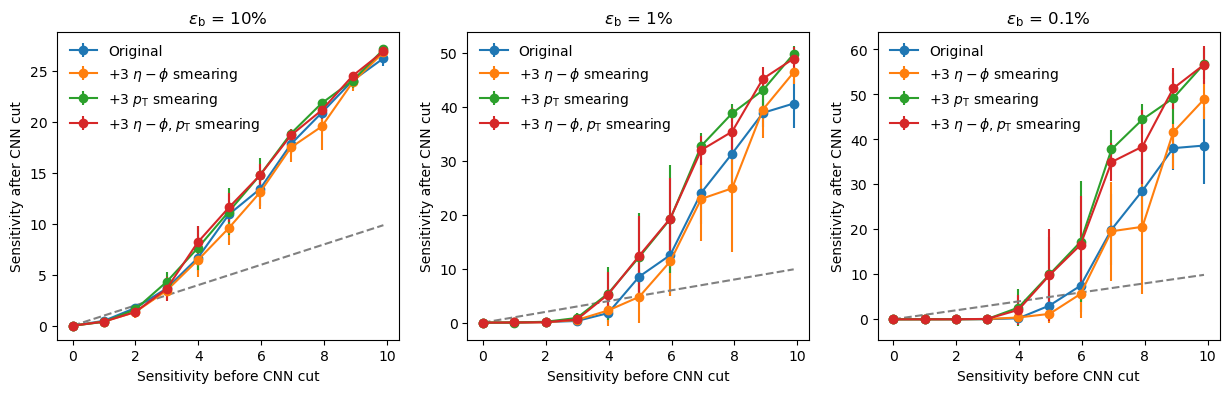

In [7]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_eta_phi_aug_3, stds_eta_phi_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_3_75x75')
sensitivities_pt_aug_3, stds_pt_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_3_75x75')
sensitivities_all_aug_3, stds_all_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_eta_phi_pt_aug_3_75x75')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_eta_phi_aug_3[i], yerr=stds_eta_phi_aug_3[i], marker='o', label='+3 $\eta-\phi$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_pt_aug_3[i], yerr=stds_pt_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_all_aug_3[i], yerr=stds_all_aug_3[i], marker='o', label='+3 $\eta-\phi, p_\mathrm{T}$ smearing')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_eta_phi_pt_aug_3_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

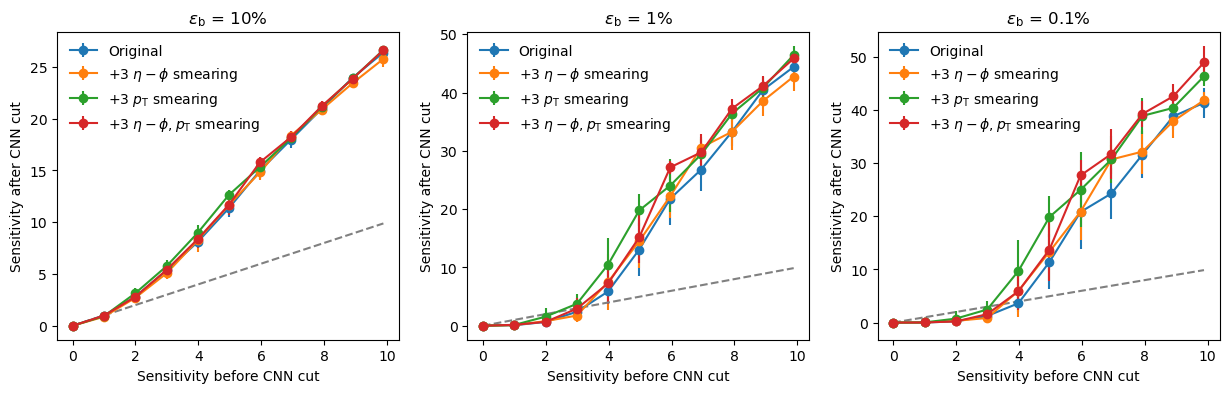

In [8]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_eta_phi_aug_3, stds_eta_phi_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_3_25x25')
sensitivities_pt_aug_3, stds_pt_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_3_25x25')
sensitivities_all_aug_3, stds_all_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_eta_phi_pt_aug_3_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_eta_phi_aug_3[i], yerr=stds_eta_phi_aug_3[i], marker='o', label='+3 $\eta-\phi$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_pt_aug_3[i], yerr=stds_pt_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_all_aug_3[i], yerr=stds_all_aug_3[i], marker='o', label='+3 $\eta-\phi, p_\mathrm{T}$ smearing')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_eta_phi_pt_aug_3_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Jet rotation

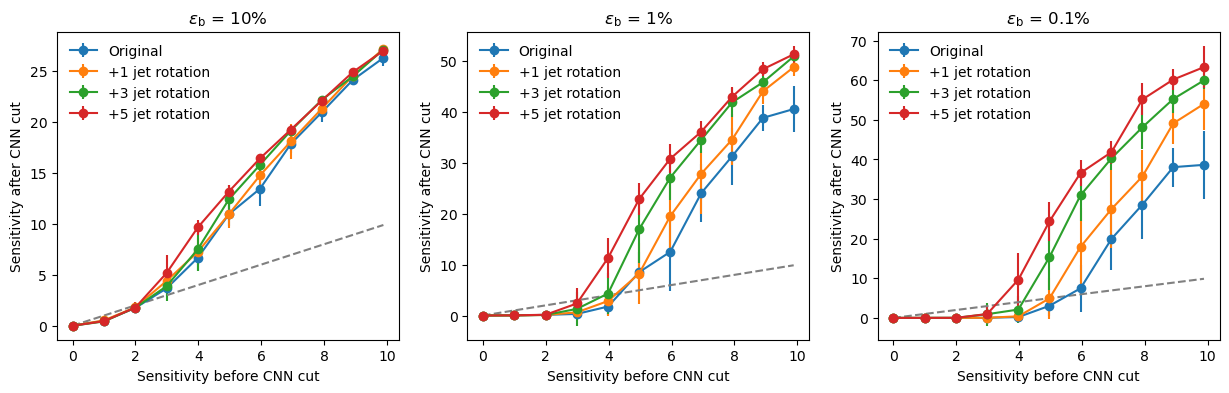

In [13]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_jet_aug_1, stds_jet_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_1_75x75')
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_3_75x75')
sensitivities_jet_aug_5, stds_jet_aug_5 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_5_75x75')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_1[i], yerr=stds_jet_aug_1[i], marker='o', label='+1 jet rotation')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_3[i], yerr=stds_jet_aug_3[i], marker='o', label='+3 jet rotation')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_5[i], yerr=stds_jet_aug_5[i], marker='o', label='+5 jet rotation')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_jet_aug_1_3_5_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

(3, 11)


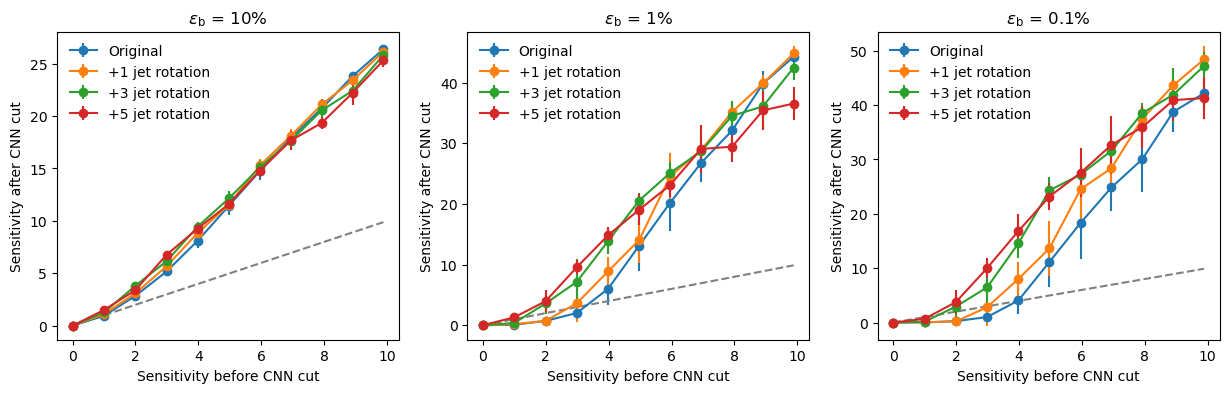

In [13]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_jet_aug_1, stds_jet_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_1_25x25')
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_3_25x25')
sensitivities_jet_aug_5, stds_jet_aug_5 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_5_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_1[i], yerr=stds_jet_aug_1[i], marker='o', label='+1 jet rotation')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_3[i], yerr=stds_jet_aug_3[i], marker='o', label='+3 jet rotation')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_5[i], yerr=stds_jet_aug_5[i], marker='o', label='+5 jet rotation')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_jet_aug_1_3_5_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Asymptotic behaviour

### Jet rotation

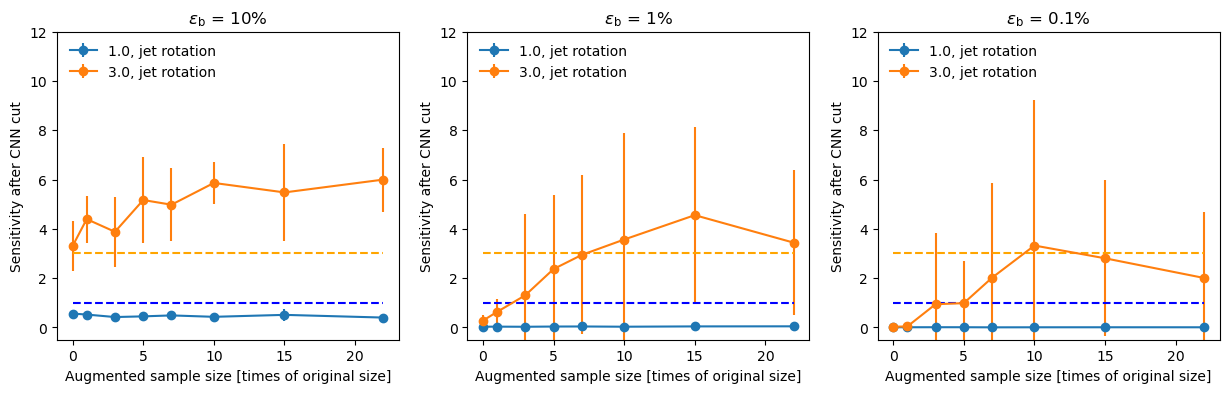

In [13]:
sample_size = [1, 3, 5, 7, 10, 15, 22]

models = ['SB_1.0_75x75'] + [f'SB_1.0_jet_aug_{n}_75x75' for n in sample_size]
sensitivities_jet_aug_1, stds_jet_aug_1 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=1.0)

models = ['SB_3.0_75x75'] + [f'SB_3.0_jet_aug_{n}_75x75' for n in sample_size]
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=3.0)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar([0] + sample_size, sensitivities_jet_aug_1[i], yerr=stds_jet_aug_1[i], marker='o', label='1.0, jet rotation')
    ax[i].errorbar([0] + sample_size, sensitivities_jet_aug_3[i], yerr=stds_jet_aug_3[i], marker='o', label='3.0, jet rotation')

    ax[i].set_title(titles[i])
    ax[i].hlines(1, 0, 22, color='b', linestyle='--')
    ax[i].hlines(3, 0, 22, color='orange', linestyle='--')
    ax[i].set_ylim(-0.5, 12)
    ax[i].set_xlabel('Augmented sample size [times of original size]')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_jet_aug_SB_1_3_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

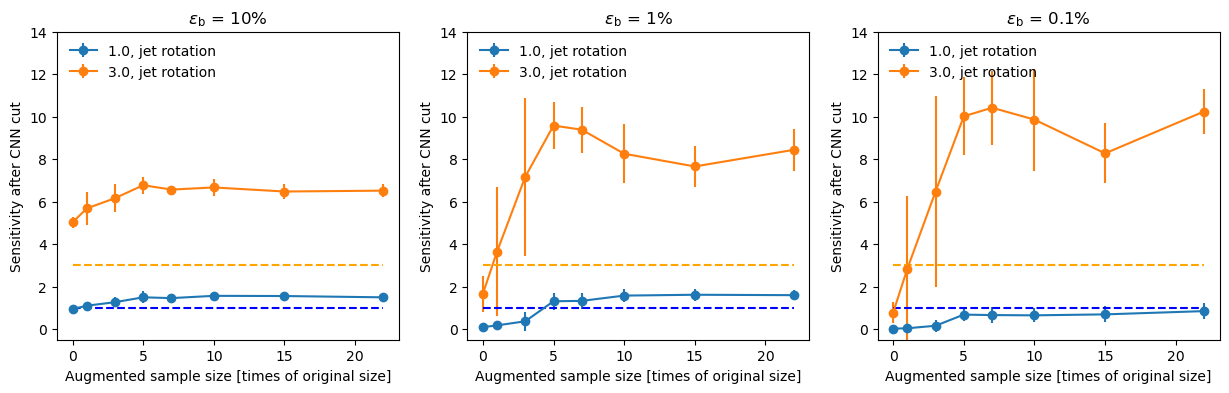

In [6]:
sample_size = [1, 3, 5, 7, 10, 15, 22]

models = ['SB_1.0_25x25'] + [f'SB_1.0_jet_aug_{n}_25x25' for n in sample_size]
sensitivities_jet_aug_1, stds_jet_aug_1 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=1.0)

models = ['SB_3.0_25x25'] + [f'SB_3.0_jet_aug_{n}_25x25' for n in sample_size]
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=3.0)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar([0] + sample_size, sensitivities_jet_aug_1[i], yerr=stds_jet_aug_1[i], marker='o', label='1.0, jet rotation')
    ax[i].errorbar([0] + sample_size, sensitivities_jet_aug_3[i], yerr=stds_jet_aug_3[i], marker='o', label='3.0, jet rotation')

    ax[i].set_title(titles[i])
    ax[i].hlines(1, 0, 22, color='b', linestyle='--')
    ax[i].hlines(3, 0, 22, color='orange', linestyle='--')
    ax[i].set_ylim(-0.5, 14)
    ax[i].set_xlabel('Augmented sample size [times of original size]')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_jet_aug_SB_1_3_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

### $p_\mathrm{T}$ smearing

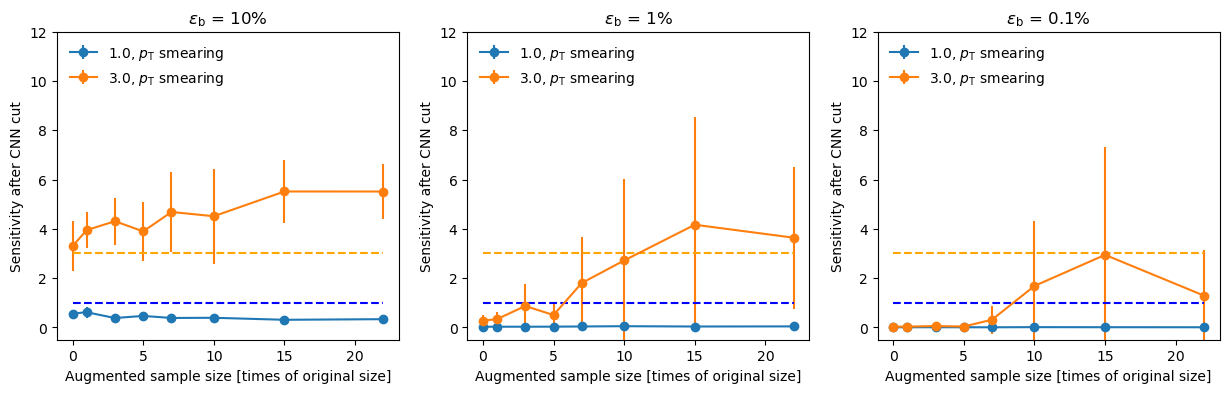

In [5]:
sample_size = [1, 3, 5, 7, 10, 15, 22]

models = ['SB_1.0_75x75'] + [f'SB_1.0_pt_aug_{n}_75x75' for n in sample_size]
sensitivities_pt_aug_1, stds_pt_aug_1 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=1.0)

models = ['SB_3.0_75x75'] + [f'SB_3.0_pt_aug_{n}_75x75' for n in sample_size]
sensitivities_pt_aug_3, stds_pt_aug_3 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=3.0)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar([0] + sample_size, sensitivities_pt_aug_1[i], yerr=stds_pt_aug_1[i], marker='o', label='1.0, $p_\mathrm{T}$ smearing')
    ax[i].errorbar([0] + sample_size, sensitivities_pt_aug_3[i], yerr=stds_pt_aug_3[i], marker='o', label='3.0, $p_\mathrm{T}$ smearing')

    ax[i].set_title(titles[i])
    ax[i].hlines(1, 0, 22, color='b', linestyle='--')
    ax[i].hlines(3, 0, 22, color='orange', linestyle='--')
    ax[i].set_ylim(-0.5, 12)
    ax[i].set_xlabel('Augmented sample size [times of original size]')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_pt_aug_SB_1_3_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

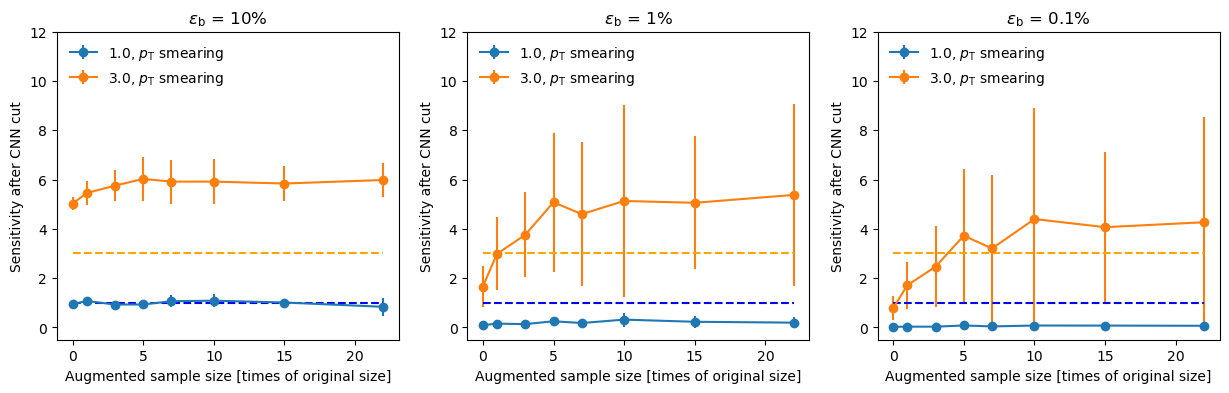

In [6]:
sample_size = [1, 3, 5, 7, 10, 15, 22]

models = ['SB_1.0_25x25'] + [f'SB_1.0_pt_aug_{n}_25x25' for n in sample_size]
sensitivities_pt_aug_1, stds_pt_aug_1 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=1.0)

models = ['SB_3.0_25x25'] + [f'SB_3.0_pt_aug_{n}_25x25' for n in sample_size]
sensitivities_pt_aug_3, stds_pt_aug_3 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=3.0)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar([0] + sample_size, sensitivities_pt_aug_1[i], yerr=stds_pt_aug_1[i], marker='o', label='1.0, $p_\mathrm{T}$ smearing')
    ax[i].errorbar([0] + sample_size, sensitivities_pt_aug_3[i], yerr=stds_pt_aug_3[i], marker='o', label='3.0, $p_\mathrm{T}$ smearing')

    ax[i].set_title(titles[i])
    ax[i].hlines(1, 0, 22, color='b', linestyle='--')
    ax[i].hlines(3, 0, 22, color='orange', linestyle='--')
    ax[i].set_ylim(-0.5, 12)
    ax[i].set_xlabel('Augmented sample size [times of original size]')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_pt_aug_SB_1_3_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

### $p_\text{T}$ smearing + jet rotation 

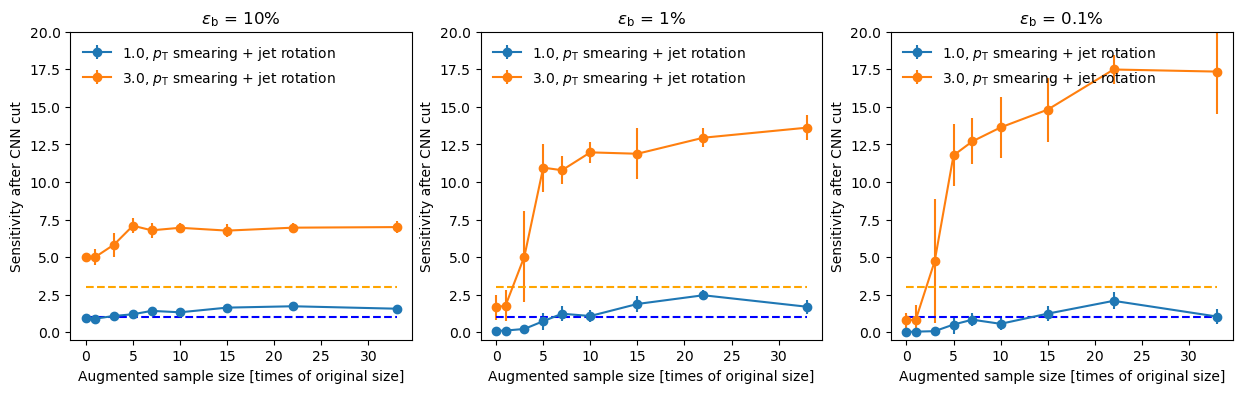

In [5]:
sample_size = [1, 3, 5, 7, 10, 15, 22, 33]

models = ['SB_1.0_25x25'] + [f'SB_1.0_pt_jet_aug_{n}_25x25' for n in sample_size]
sensitivities_pt_jet_aug_1, stds_pt_jet_aug_1 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=1.0)

models = ['SB_3.0_25x25'] + [f'SB_3.0_pt_jet_aug_{n}_25x25' for n in sample_size]
sensitivities_pt_jet_aug_3, stds_pt_jet_aug_3 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=3.0)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar([0] + sample_size, sensitivities_pt_jet_aug_1[i], yerr=stds_pt_jet_aug_1[i], marker='o', label='1.0, $p_\mathrm{T}$ smearing + jet rotation')

    ax[i].errorbar([0] + sample_size, sensitivities_pt_jet_aug_3[i], yerr=stds_pt_jet_aug_3[i], marker='o', label='3.0, $p_\mathrm{T}$ smearing + jet rotation')

    ax[i].set_title(titles[i])
    ax[i].hlines(1, 0, 33, color='b', linestyle='--')
    ax[i].hlines(3, 0, 33, color='orange', linestyle='--')
    ax[i].set_ylim(-0.5, 20)
    ax[i].set_xlabel('Augmented sample size [times of original size]')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_pt_jet_aug_SB_1_3_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

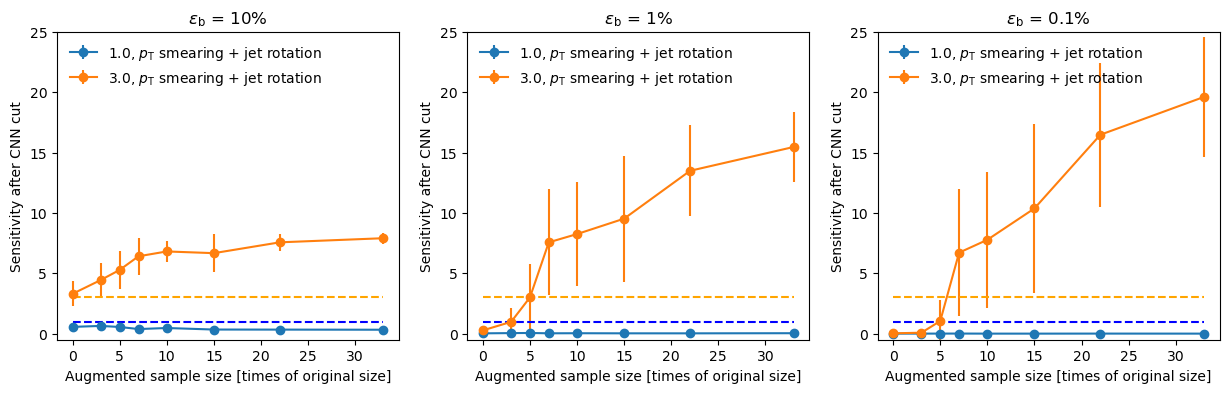

In [6]:
sample_size = [3, 5, 7, 10, 15, 22, 33]

models = ['SB_1.0_75x75'] + [f'SB_1.0_pt_jet_aug_{n}_75x75' for n in sample_size]
sensitivities_pt_jet_aug_1, stds_pt_jet_aug_1 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=1.0)

models = ['SB_3.0_75x75'] + [f'SB_3.0_jet_aug_{n}_75x75' for n in sample_size]
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=3.0)

models = ['SB_3.0_75x75'] + [f'SB_3.0_pt_jet_aug_{n}_75x75' for n in sample_size]
sensitivities_pt_jet_aug_3, stds_pt_jet_aug_3 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=3.0)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar([0] + sample_size, sensitivities_pt_jet_aug_1[i], yerr=stds_pt_jet_aug_1[i], marker='o', label='1.0, $p_\mathrm{T}$ smearing + jet rotation')
    ax[i].errorbar([0] + sample_size, sensitivities_pt_jet_aug_3[i], yerr=stds_pt_jet_aug_3[i], marker='o', label='3.0, $p_\mathrm{T}$ smearing + jet rotation')

    ax[i].set_title(titles[i])
    ax[i].hlines(1, 0, 33, color='b', linestyle='--')
    ax[i].hlines(3, 0, 33, color='orange', linestyle='--')
    ax[i].set_ylim(-0.5, 25)
    ax[i].set_xlabel('Augmented sample size [times of original size]')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_pt_jet_aug_SB_1_3_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

### Summary

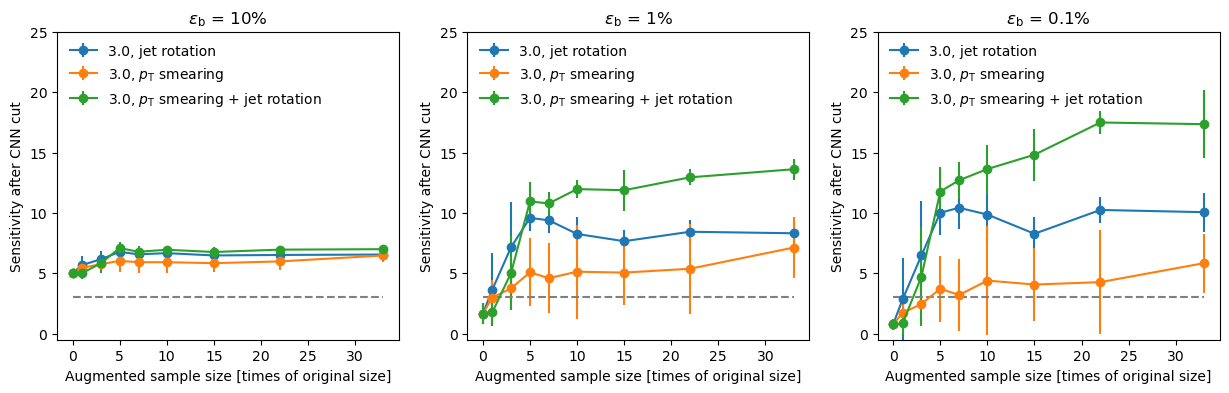

In [5]:
sample_size = [1, 3, 5, 7, 10, 15, 22, 33]
res = 25
models = [f'SB_3.0_{res}x{res}'] + [f'SB_3.0_jet_aug_{n}_{res}x{res}' for n in sample_size]
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=3.0)

models = [f'SB_3.0_{res}x{res}'] + [f'SB_3.0_pt_aug_{n}_{res}x{res}' for n in sample_size]
sensitivities_pt_aug_3, stds_pt_aug_3 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=3.0)

models = [f'SB_3.0_{res}x{res}'] + [f'SB_3.0_pt_jet_aug_{n}_{res}x{res}' for n in sample_size]
sensitivities_pt_jet_aug_3, stds_pt_jet_aug_3 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=3.0)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar([0] + sample_size, sensitivities_jet_aug_3[i], yerr=stds_jet_aug_3[i], marker='o', label='3.0, jet rotation')
    ax[i].errorbar([0] + sample_size, sensitivities_pt_aug_3[i], yerr=stds_pt_aug_3[i], marker='o', label='3.0, $p_\mathrm{T}$ smearing')
    ax[i].errorbar([0] + sample_size, sensitivities_pt_jet_aug_3[i], yerr=stds_pt_jet_aug_3[i], marker='o', label='3.0, $p_\mathrm{T}$ smearing + jet rotation')

    ax[i].set_title(titles[i])
    ax[i].hlines(3, 0, sample_size[-1], color='gray', linestyle='--')
    ax[i].set_ylim(-0.5, 25)
    ax[i].set_xlabel('Augmented sample size [times of original size]')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig(f'../figures/HVmodel_sensitivity_improvement_summary_aug_SB_3_res_{res}.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

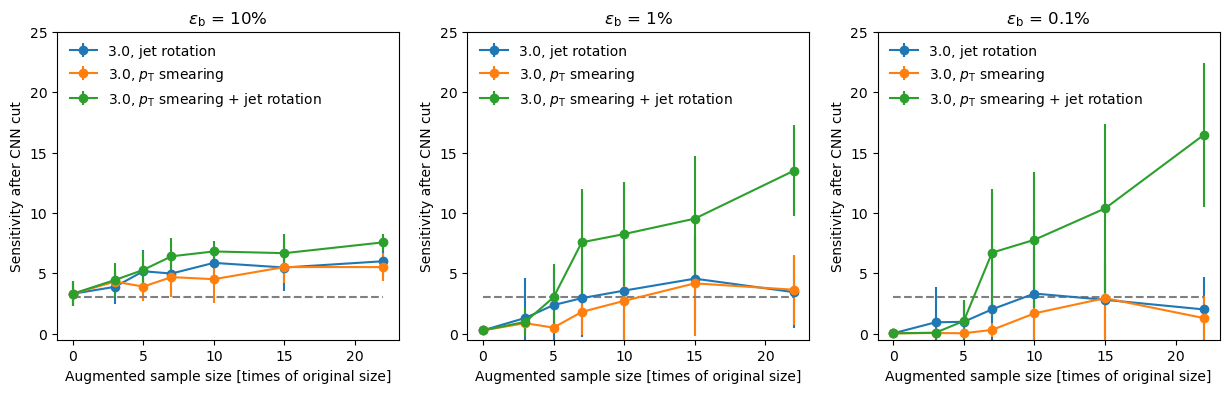

In [6]:
sample_size = [3, 5, 7, 10, 15, 22]
res = 75
models = [f'SB_3.0_{res}x{res}'] + [f'SB_3.0_jet_aug_{n}_{res}x{res}' for n in sample_size]
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=3.0)

models = [f'SB_3.0_{res}x{res}'] + [f'SB_3.0_pt_aug_{n}_{res}x{res}' for n in sample_size]
sensitivities_pt_aug_3, stds_pt_aug_3 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=3.0)

models = [f'SB_3.0_{res}x{res}'] + [f'SB_3.0_pt_jet_aug_{n}_{res}x{res}' for n in sample_size]
sensitivities_pt_jet_aug_3, stds_pt_jet_aug_3 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=3.0)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar([0] + sample_size, sensitivities_jet_aug_3[i], yerr=stds_jet_aug_3[i], marker='o', label='3.0, jet rotation')
    ax[i].errorbar([0] + sample_size, sensitivities_pt_aug_3[i], yerr=stds_pt_aug_3[i], marker='o', label='3.0, $p_\mathrm{T}$ smearing')
    ax[i].errorbar([0] + sample_size, sensitivities_pt_jet_aug_3[i], yerr=stds_pt_jet_aug_3[i], marker='o', label='3.0, $p_\mathrm{T}$ smearing + jet rotation')

    ax[i].set_title(titles[i])
    ax[i].hlines(3, 0, sample_size[-1], color='gray', linestyle='--')
    ax[i].set_ylim(-0.5, 25)
    ax[i].set_xlabel('Augmented sample size [times of original size]')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig(f'../figures/HVmodel_sensitivity_improvement_summary_aug_SB_3_res_{res}.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()


## $p_\text{T}$ smearing + jet rotation 

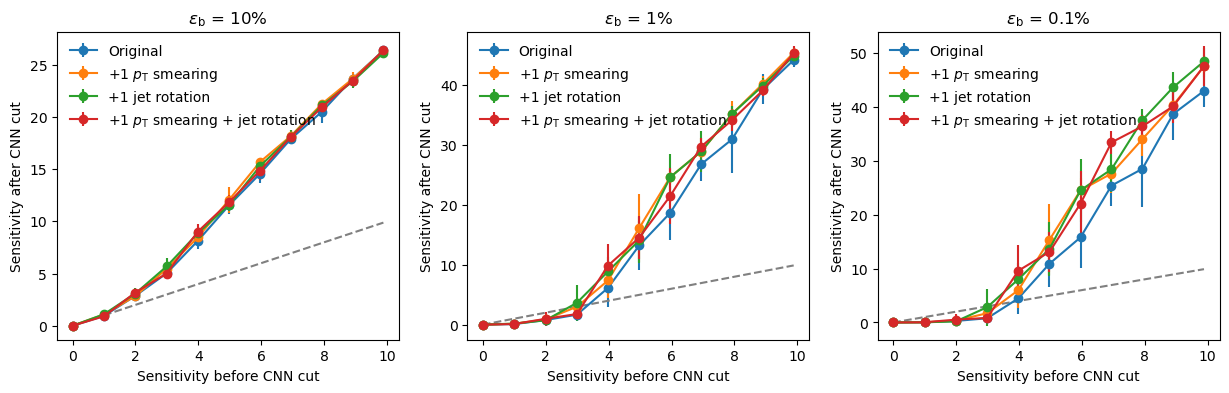

In [5]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_jet_aug_1, stds_jet_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_1_25x25')
sensitivities_pt_aug_1, stds_pt_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_1_25x25')
sensitivities_pt_jet_aug_1, stds_pt_jet_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_pT_jet_aug_1_25x25')


sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_pt_aug_1[i], yerr=stds_pt_aug_1[i], marker='o', label='+1 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_1[i], yerr=stds_jet_aug_1[i], marker='o', label='+1 jet rotation')
    ax[i].errorbar(sensitivities, sensitivities_pt_jet_aug_1[i], yerr=stds_pt_jet_aug_1[i], marker='o', label='+1 $p_\mathrm{T}$ smearing + jet rotation')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_pt_jet_aug_1_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

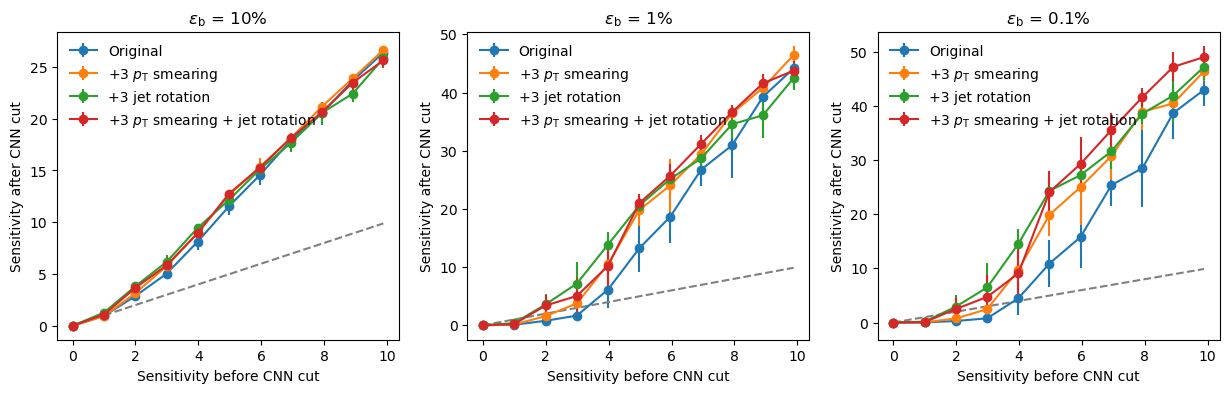

In [6]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_3_25x25')
sensitivities_pt_aug_3, stds_pt_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_3_25x25')
sensitivities_pt_jet_aug_3, stds_pt_jet_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pT_jet_aug_3_25x25')


sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_pt_aug_3[i], yerr=stds_pt_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_3[i], yerr=stds_jet_aug_3[i], marker='o', label='+3 jet rotation')
    ax[i].errorbar(sensitivities, sensitivities_pt_jet_aug_3[i], yerr=stds_pt_jet_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing + jet rotation')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_pt_jet_aug_3_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

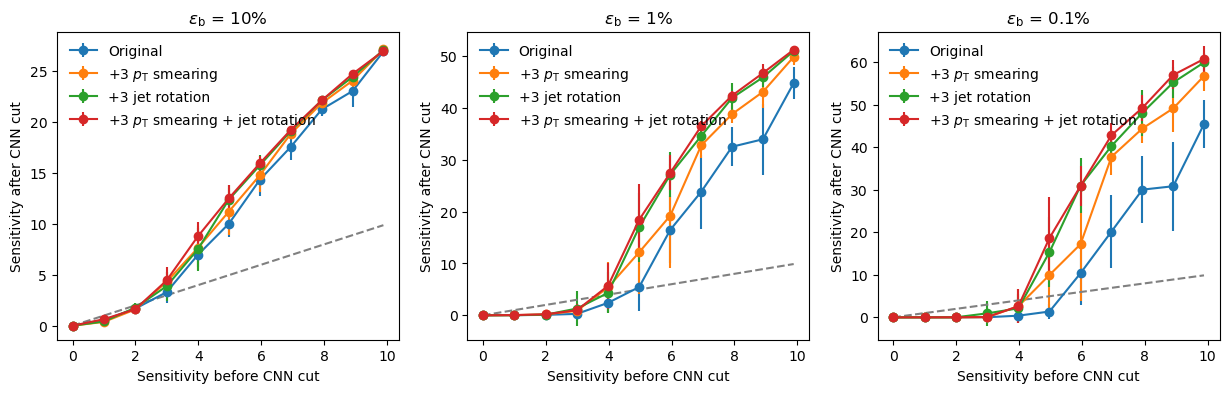

In [7]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_3_75x75')
sensitivities_pt_aug_3, stds_pt_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_3_75x75')
sensitivities_pt_jet_aug_3, stds_pt_jet_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pT_jet_aug_3_75x75')


sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_pt_aug_3[i], yerr=stds_pt_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_3[i], yerr=stds_jet_aug_3[i], marker='o', label='+3 jet rotation')
    ax[i].errorbar(sensitivities, sensitivities_pt_jet_aug_3[i], yerr=stds_pt_jet_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing + jet rotation')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_pt_jet_aug_3_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Different training dataset

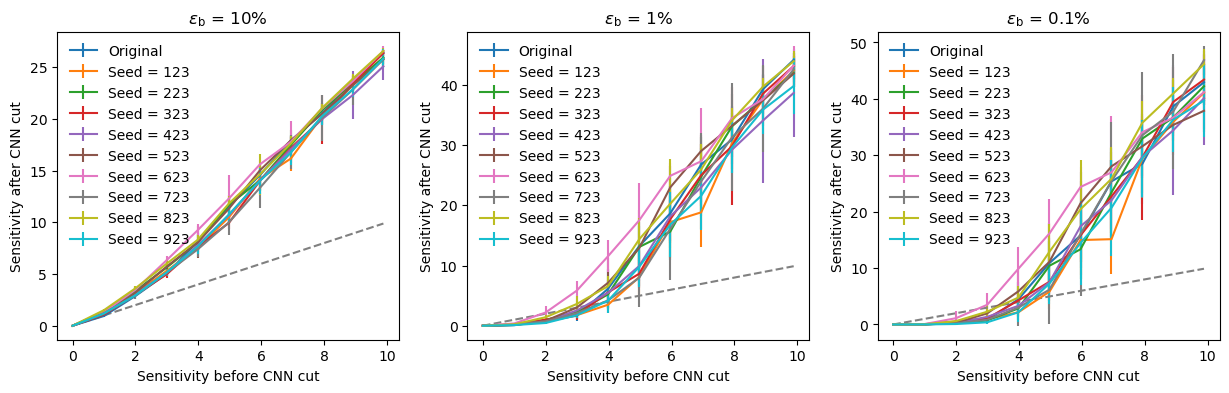

In [5]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='', label='Original')
    for j in range(1, 10):
        sn = j * 100 + 23
        sensitivities_rad, stds_rad = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25_sn_' + f'{sn}')
        ax[i].errorbar(sensitivities, sensitivities_rad[i], yerr=stds_rad[i], marker='', label=f'Seed = {sn}')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_random_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

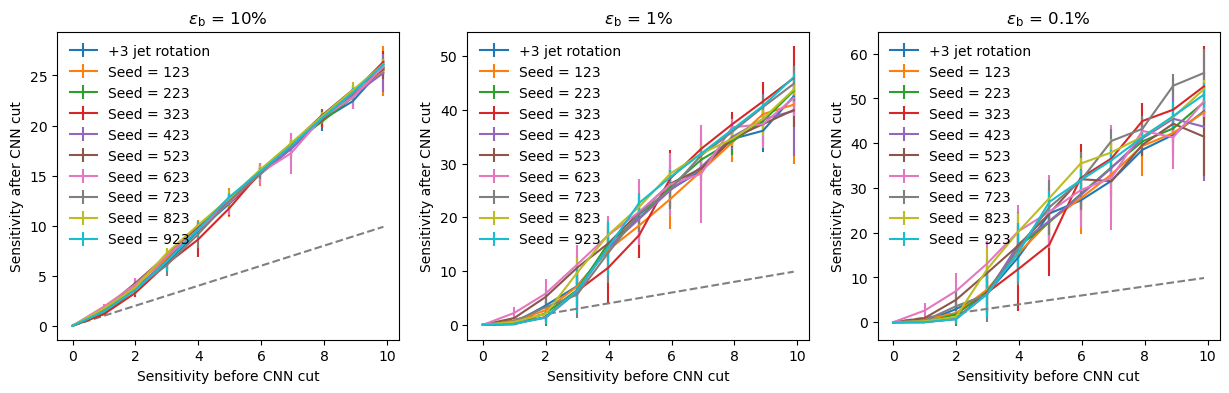

In [6]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_3_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='', label='+3 jet rotation')
    for j in range(1, 10):
        sn = j * 100 + 23
        sensitivities_rad, stds_rad = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_3_25x25_sn_' + f'{sn}')
        ax[i].errorbar(sensitivities, sensitivities_rad[i], yerr=stds_rad[i], marker='', label=f'Seed = {sn}')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_jet_aug_3_random_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

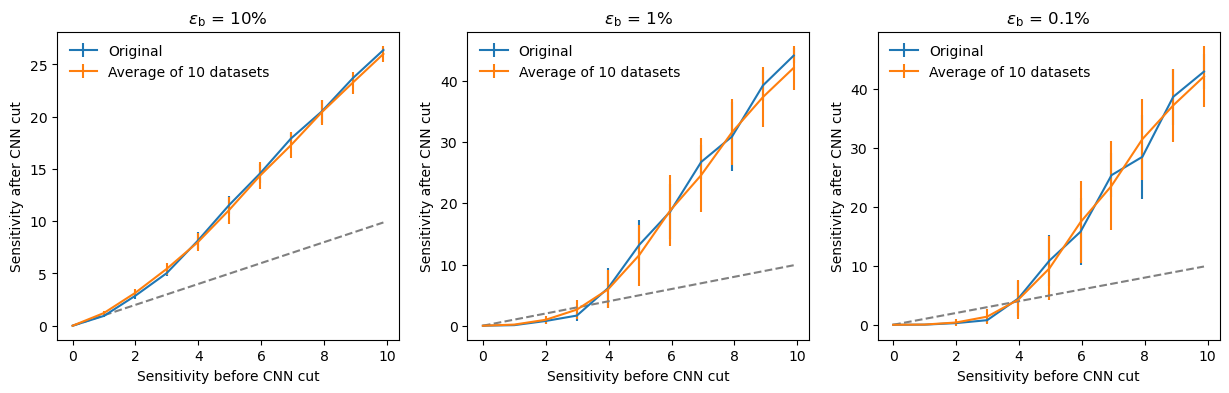

In [7]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')

model_formats = ['SB_{:.1f}_25x25'] + ['SB_{:.1f}_25x25_sn_'+ f'{sn}' for sn in range(123, 1000, 100)]
sensitivities_rad, stds_rad = get_average_realistic_sensitivity_and_std(model_formats)

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_rad[i], yerr=stds_rad[i], marker='', label=f'Average of 10 datasets')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_random_average_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

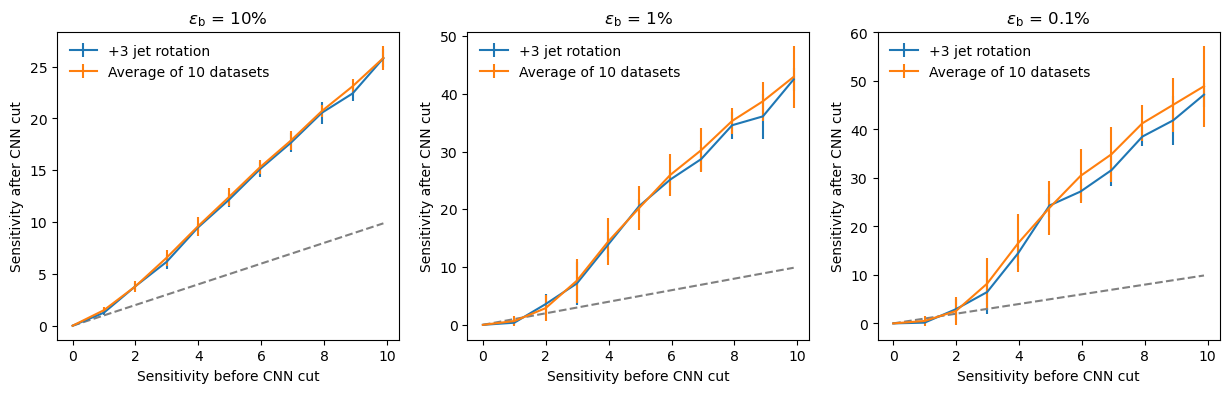

In [8]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_3_25x25')

model_formats = ['SB_{:.1f}_jet_aug_3_25x25'] + ['SB_{:.1f}_jet_aug_3_25x25_sn_'+ f'{sn}' for sn in range(123, 1000, 100)]
sensitivities_rad, stds_rad = get_average_realistic_sensitivity_and_std(model_formats)

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='', label='+3 jet rotation')
    ax[i].errorbar(sensitivities, sensitivities_rad[i], yerr=stds_rad[i], marker='', label=f'Average of 10 datasets')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_jet_aug_3_random_average_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()